### MERT GÜNEŞ HOMEWORK 3
### 2021702093
### IE - 582

In [225]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import timeit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

### Data Preprocessing

In this project, same data has been used with previous homework. Data has been splitted as test and train, labels also has been splitted as "y_test" and "y_train".

In [211]:
X_train = pd.read_csv("uWaveGestureLibrary_X_TRAIN",sep=";",header=None)
Y_train = pd.read_csv("uWaveGestureLibrary_Y_TRAIN",sep=";",header=None)
Z_train = pd.read_csv("uWaveGestureLibrary_Z_TRAIN",sep=";",header=None)
X_test = pd.read_csv("uWaveGestureLibrary_X_TEST",sep=";",header=None)
Y_test = pd.read_csv("uWaveGestureLibrary_Y_TEST",sep=";",header=None)
Z_test = pd.read_csv("uWaveGestureLibrary_Z_TEST",sep=";",header=None)

In [212]:
X_train.columns = ['Class']+['X_axis'+str(i) for i in range(1,316)]
Y_train.columns = ['Class']+['Y_axis'+str(i) for i in range(1,316)]
Z_train.columns = ['Class']+['Z_axis'+str(i) for i in range(1,316)]
X_test.columns = ['Class']+['X_axis'+str(i) for i in range(1,316)]
Y_test.columns = ['Class']+['Y_axis'+str(i) for i in range(1,316)]
Z_test.columns = ['Class']+['Z_axis'+str(i) for i in range(1,316)]

In [213]:
Train = pd.merge(X_train,Y_train.drop(["Class"],axis=1),how="left",left_index=True,right_index=True)
Train = pd.merge(Train,Z_train.drop(["Class"],axis=1),how="left",left_index=True,right_index=True)
Test = pd.merge(X_test,Y_test.drop(["Class"],axis=1),how="left",left_index=True,right_index=True)
Test = pd.merge(Test,Z_test.drop(["Class"],axis=1),how="left",left_index=True,right_index=True)

In [214]:
y_test = Test["Class"]
X_test = Test.drop(["Class"],axis=1)
X_train = Train.drop(["Class"],axis=1)
y_train = Train["Class"]

## TASK 1

Part A

For Nearest Neighbors model, two different distance metrics has been used: Euclidean and Chebyshev. Best number of neighbors is same for each method: 3 for 10-Fold Cross Validation.

In [218]:
model_euc = KNeighborsClassifier(metric="euclidean")
n = list(np.arange(2,55))
KNN_Grid = GridSearchCV(model_euc,param_grid={'n_neighbors':n},cv=10,scoring='accuracy')
KNN_Grid.fit(X_train,y_train)
KNN_Grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [219]:
model_cheb = KNeighborsClassifier(metric="chebyshev")
n = list(np.arange(2,55))
KNN_Grid = GridSearchCV(model_cheb,param_grid={'n_neighbors':n},cv=10,scoring='accuracy')
KNN_Grid.fit(X_train,y_train)
KNN_Grid.best_estimator_

KNeighborsClassifier(metric='chebyshev', n_neighbors=3)

Part B

Train Accuracy Score:  0.9676339285714286
Test Accuracy Score:  0.9438860971524288
Run Time:  0.2580955419980455


Text(33.0, 0.5, 'True labels')

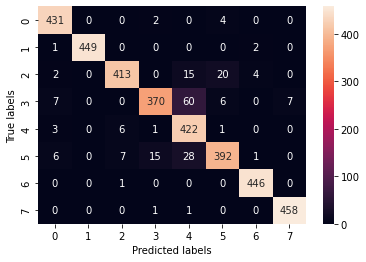

In [227]:
start = timeit.default_timer()
model_euc = KNeighborsClassifier(metric="euclidean",n_neighbors=3)
model_euc.fit(X_train,y_train)
y_train_pred = model_euc.predict(X_train)
y_test_pred = model_euc.predict(X_test)
stop = timeit.default_timer()
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)
conf = confusion_matrix(y_test,y_test_pred)
print("Train Accuracy Score: ", accuracy_train)
print("Test Accuracy Score: ", accuracy_test)
print("Run Time: ", stop-start)
plot = plt.subplot()
sns.heatmap(conf,annot=True,fmt='g',ax=plot)
plot.set_xlabel('Predicted labels')
plot.set_ylabel('True labels')

In addition to accuracy scores, It can also be seen in the confusion matrix that the most false predictions are seen in the class 4.

Train Accuracy Score:  0.90625
Test Accuracy Score:  0.8587381351200447
Run Time:  2.432734917005291


Text(33.0, 0.5, 'True labels')

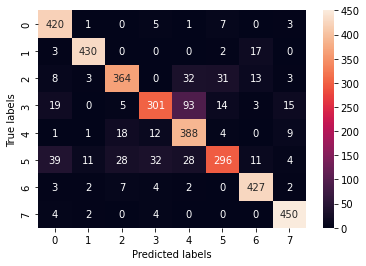

In [228]:
start = timeit.default_timer()
model_cheb = KNeighborsClassifier(metric="chebyshev",n_neighbors=3)
model_cheb.fit(X_train,y_train)
y_train_pred = model_cheb.predict(X_train)
y_test_pred = model_cheb.predict(X_test)
stop = timeit.default_timer()
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)
conf = confusion_matrix(y_test,y_test_pred)
print("Train Accuracy Score: ", accuracy_train)
print("Test Accuracy Score: ", accuracy_test)
print("Run Time: ", stop-start)
plot = plt.subplot()
sns.heatmap(conf,annot=True,fmt='g',ax=plot)
plot.set_xlabel('Predicted labels')
plot.set_ylabel('True labels')

In addition to accuracy scores, It can also be seen in the confusion matrix that the most false predictions are seen in the class 4 and 6.

Also, euclidean is greatly better than chebyshev for this data because accuracy score is nearly 0.1 point greater than other.

Part C

Rather than giving the same weight to all axes, it may be more accurate to give different weights to the axes. For example, it is seen that class 4 is estimated incorrectly in the models. Considering that 4 is horizontal, more coefficients can be given to X.

## Task 2

Labels are created for classification by using Numpy. Threshold were set as percent of Class 3 in all data.

In [232]:
y_test = np.where(y_test == 3, 1, 0)

In [233]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([3128,  454]))

In [234]:
thr_test = 454/(3128+454)

In [235]:
y_train = np.where(y_train == 3, 1, 0)

In [236]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([790, 106]))

In [237]:
thr_train = 106/(790+106)

Part A

Train Accuracy Score:  0.9676339285714286
Test Accuracy Score:  0.9179229480737019
Run Time:  0.16500020799867343


Text(33.0, 0.5, 'True labels')

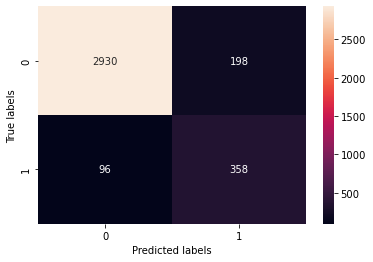

In [238]:
start = timeit.default_timer()
model_lr = LogisticRegression(max_iter=50000,random_state=42)
model_lr.fit(X_train,y_train)
y_train_pred = (model_lr.predict_proba(X_train)[:,1] >= thr_train).astype(int)
y_test_pred = (model_lr.predict_proba(X_test)[:,1] >= thr_test).astype(int)
stop = timeit.default_timer()
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)
conf = confusion_matrix(y_test,y_test_pred)
print("Train Accuracy Score: ", accuracy_train)
print("Test Accuracy Score: ", accuracy_test)
print("Run Time: ", stop-start)
plot = plt.subplot()
sns.heatmap(conf,annot=True,fmt='g',ax=plot)
plot.set_xlabel('Predicted labels')
plot.set_ylabel('True labels')

Logistic Regression model has been created and accuracy score for test data is 0.92 is enough to trust model. Also, most of negative has been predicted correctly but nearly %25 of positives has been predicted as 0.

Part B

In [240]:
lasso_grid = LogisticRegressionCV(Cs=[0.1,0.5,1,5,10,100],cv=10,penalty='l1',solver="liblinear",
                                  scoring='neg_log_loss',max_iter=50000,random_state=42)
lasso_grid.fit(X_train,y_train)
lasso_grid.C_

array([0.5])

0.5 is best lambda for this data.

Train Accuracy Score:  0.9341517857142857
Test Accuracy Score:  0.9204355108877722
Run Time:  0.3548653750040103


Text(33.0, 0.5, 'True labels')

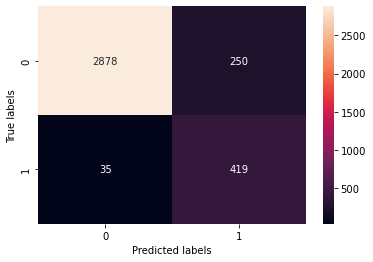

In [241]:
start = timeit.default_timer()
model_lasso = LogisticRegressionCV(Cs=[0.5],penalty='l1',solver="liblinear",max_iter=50000,random_state=42)
model_lasso.fit(X_train,y_train)
y_train_pred = (model_lasso.predict_proba(X_train)[:,1] >= thr_train).astype(int)
y_test_pred = (model_lasso.predict_proba(X_test)[:,1] >= thr_test).astype(int)
stop = timeit.default_timer()
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)
conf = confusion_matrix(y_test,y_test_pred)
print("Train Accuracy Score: ", accuracy_train)
print("Test Accuracy Score: ", accuracy_test)
print("Run Time: ", stop-start)
plot = plt.subplot()
sns.heatmap(conf,annot=True,fmt='g',ax=plot)
plot.set_xlabel('Predicted labels')
plot.set_ylabel('True labels')

Accuracy of model slightly increased when Lasso Regression has been used. Ratio of positives has been predicted correctly is greater than model without Lasso. 

In [242]:
a = 0
for i in range(0,945):
    if model_lasso.coef_[:,i] == 0:
        a+=1
    else:
        pass
print("Percent of zero features: ", a/945)

Percent of zero features:  0.9248677248677248


Also, Lasso model has just used 0.075 of features to build model and this was enough for better predictions.

Part C

In [243]:
X_train_dist = pd.DataFrame(pairwise_distances(X_train,metric="euclidean"),columns=X_train.index,index=X_train.index)

In [244]:
X_test_dist = pd.DataFrame(pairwise_distances(X_test,X_train,metric="euclidean"),columns=X_train.index,index=X_test.index)

In [245]:
lasso_grid = LogisticRegressionCV(Cs=[0.1,0.5,1,5,10,100],cv=10,penalty='l1',solver="liblinear",
                                  scoring='neg_log_loss',max_iter=50000,random_state=42)
lasso_grid.fit(X_train_dist,y_train)
lasso_grid.C_

array([5.])

Best lambda is 5 for distance data.

Train Accuracy Score:  0.9977678571428571
Test Accuracy Score:  0.9852037967615858
Run Time:  1.6614355000056094


Text(33.0, 0.5, 'True labels')

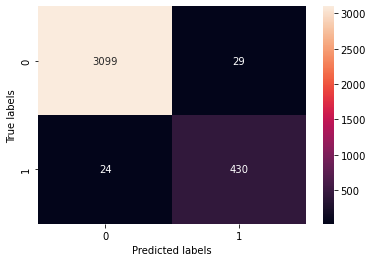

In [247]:
start = timeit.default_timer()
model_lasso = LogisticRegressionCV(Cs=[5],penalty='l1',solver="liblinear",max_iter=50000,random_state=42)
model_lasso.fit(X_train_dist,y_train)
y_train_pred = (model_lasso.predict_proba(X_train_dist)[:,1] >= thr_train).astype(int)
y_test_pred = (model_lasso.predict_proba(X_test_dist)[:,1] >= thr_test).astype(int)
stop = timeit.default_timer()
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)
conf = confusion_matrix(y_test,y_test_pred)
print("Train Accuracy Score: ", accuracy_train)
print("Test Accuracy Score: ", accuracy_test)
print("Run Time: ", stop-start)
sns.heatmap(conf,annot=True,fmt="g")
plot = plt.subplot()
sns.heatmap(conf,annot=True,fmt='g',ax=plot)
plot.set_xlabel('Predicted labels')
plot.set_ylabel('True labels')

0.985 accuracy score is best, usage of distance matrix is a better way than previous data models. In addition, true positive and negative rates are best among all models.

In [203]:
a = 0
for i in range(0,896):
    if model_lasso.coef_[:,i] == 0:
        a+=1
    else:
        pass
print("Percent of zero features: ", a/896)

Percent of zero features:  0.14955357142857142


Models are using most of features now rather than previous Lasso model.

Part D

KNN Classifier Euclidean Test Accuracy: 0.9438860971524288
KNN Classifier Chebyshev Test Accuracy: 0.8587381351200447
Logistic Regression Test Accuracy: 0.9179229480737019
Logistic Regression Lasso Test Accuracy: 0.9204355108877722
Logistic Regression Lasso Distance Matrix: 0.9852037967615858
    
As can be seen, lasso and distance matrix preference gives the best results for this data. If KNN is to be used, euclidean will be a more accurate metric.